# Описание данных

# Часть 1  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Часть 2  
Файл /datasets/orders.csv с результатами A/B-тестов:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv  
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта

В крупном интернет-магазине подготовлен список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты

## Часть 1. Приоритизация гипотез

### Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters

In [2]:
# снимем ограничение на колличество отображаемых столбцов

pd.set_option('display.max_columns', None)

# изменим формат отображения чисел

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# создаём датасеты из загруженных данных

try:
    hypothesis = pd.read_csv('___.csv')
    orders = pd.read_csv('___.csv')
    visitors = pd.read_csv('___.csv')
except:
    hypothesis = pd.read_csv('https://___.csv')
    orders = pd.read_csv('https://___.csv')
    visitors = pd.read_csv('https://___.csv')

In [4]:
# напишем функцию для вывода информации о таблице

def get_info (df):
    name = [x for x in globals() if globals()[x] is df][0]
    print('Содержимое {}:'.format(name))
    display(df.head())
    print('Информация о распределение данных {}:'.format(name))
    display(df.describe())
    print('Информация о {}:'.format(name))
    display(df.info())
    print('Колличество дубликатов: {}'.format(df.duplicated().sum()))

In [5]:
get_info(hypothesis)

Содержимое hypothesis:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Информация о распределение данных hypothesis:


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Информация о hypothesis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Колличество дубликатов: 0


In [6]:
get_info(orders)

Содержимое orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Информация о распределение данных orders:


,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


Информация о orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Колличество дубликатов: 0


In [7]:
get_info(visitors)

Содержимое visitors:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Информация о распределение данных visitors:


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


Информация о visitors:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Колличество дубликатов: 0


In [8]:
# приведем к нижнему регистру названия столбцов

hypothesis.columns = map(str.lower, hypothesis.columns)

# сразу проверим названия столбцов

hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [9]:
# преобразуем тип данных о времени

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)  

- привели названия столбцов к нижнему регистру,
- изменили тип данных столбца с датой,
- дубликаты и пропуски не обнаружили.

### Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета

In [10]:
pd.set_option("max_colwidth", 999)

In [11]:
# посчитаем ICE для гипотез

hypothesis['ice'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
sort_ice_hypothesis = hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).round(2)
sort_ice_hypothesis

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [12]:
print('Наивысший ICE, равный {}, у гипотизы с индексом {}: "{}"'.format(
    sort_ice_hypothesis['ice'][sort_ice_hypothesis.index[0]],
    sort_ice_hypothesis.index[0],
    sort_ice_hypothesis['hypothesis'][sort_ice_hypothesis.index[0]]
))

Наивысший ICE, равный 16.2, у гипотизы с индексом 8: "Запустить акцию, дающую скидку на товар в день рождения"


### Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета

In [13]:
# Посчитаем RICE для гипотез

hypothesis['rice'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
sort_rice_hypothesis = hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).round(2)
sort_rice_hypothesis

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [14]:
print('Наивысший RICE, равный {}, у гипотизы с индексом {}: "{}"'.format(
    sort_rice_hypothesis['rice'][sort_rice_hypothesis.index[0]],
    sort_rice_hypothesis.index[0],
    sort_rice_hypothesis['hypothesis'][sort_rice_hypothesis.index[0]]
))

Наивысший RICE, равный 112.0, у гипотизы с индексом 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


### Анализ, как изменилась приоритизация гипотез при применении RICE вместо ICE

In [15]:
# посмотрим на таблицу

hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


**Выводы**
- пятёрка лучших гипотез по методу `ICE` и `RICE`, совпадает (0, 2, 6, 7, 8),
- для `ICE` лучшая гипотеза с индексом `8`, а для `RICE` под номером `7`.

Так получилось потому, что параметр reach ,для 7-ой гипотезы равен 10, в то время как у остальных гипотез он меньше.
Параметр охвата (Reach), использующийся в методе RICE изменил приоритетность, полученную по методу ICE.

Кроме силы гипотезы нужно учитывать и то, сколько пользователей она затронет.

## Часть 2. Анализ A/B-теста

### Проверим выборки на предмет пользователей, попавших в обе группы:

In [16]:
# выборка пользователей, попавших в обе выборки

duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())
len(duplicated_users)

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58

In [17]:
print('Общее количество пользователей до удаления "двойных" пользователей-', orders['visitorId'].nunique())
print('количество пользователей в группе А -', orders.query('group == "A"')['visitorId'].nunique())
print('количество пользователей в группе В -', orders.query('group == "B"')['visitorId'].nunique())

Общее количество пользователей до удаления "двойных" пользователей- 1031
количество пользователей в группе А - 503
количество пользователей в группе В - 586


Пользователей попавших в обе группы - 58, это около 10% в каждой группе. Их участие сразу в обоих группах может субъективно исказить результаты, а также повлиять на расчет выбросов. Но поскольку нам известны только id пользователей, совершивших хоть один платеж, а "неплатящие" неизвестны, то удаление таких пользователей может также исказить результаты в сторону "неплатящих". Оставим их в данных, а результаты будем анализировать предварительно разделив данные по группам А и В.

### Построим график кумулятивной выручки по группам 

In [18]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


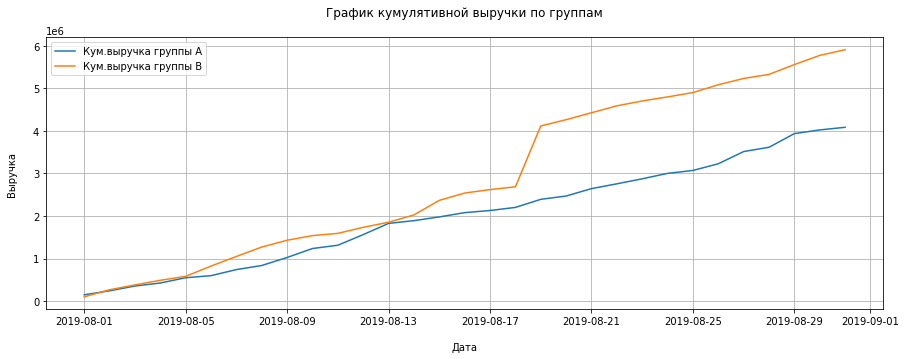

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.grid()
plt.legend() ;

**Вывод:**

Наблюдается резкий скачек в графике у группы В, возможно имеют место аномально большое количество заказов или аномально высокий средний чек. Запомним этот момент 19.08.2019.

### Построим график кумулятивного среднего чека по группам

Чтобы построить графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

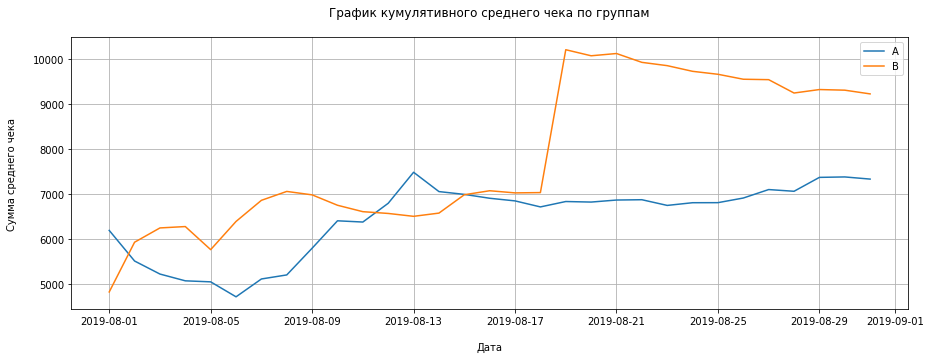

In [20]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека\n')
plt.legend();

**Вывод**

Ком.значение среднего чека по сегментам нестабильно. Возможно имеются аномальные значения (выбросы), которые искажают общую картину.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

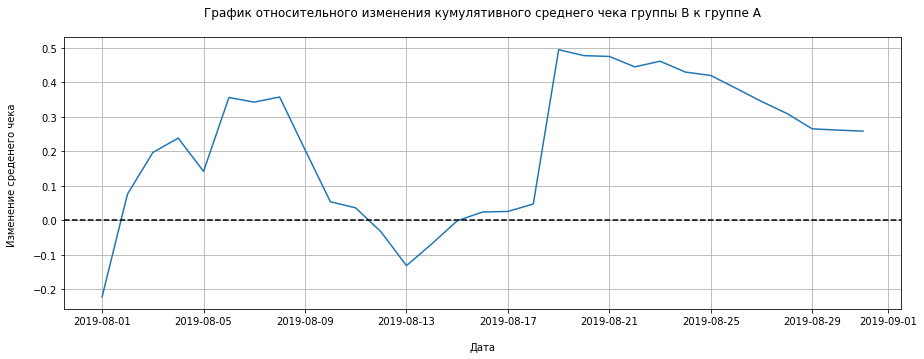

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод**

Глядя на график относительного различия в среднем чеке между группами, видим как сильно меняются значения в определенные даты. Веротяно, тогда и были совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам

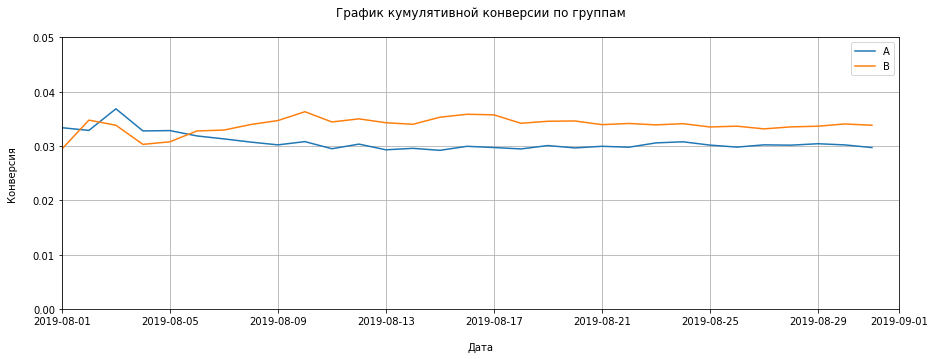

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия\n')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

**Вывод**

Сначала сегмент `А` имел большую конверсию, но чуть позже сегмент `В` выровнялся и зафиксировался больше значения сегмента `А`.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

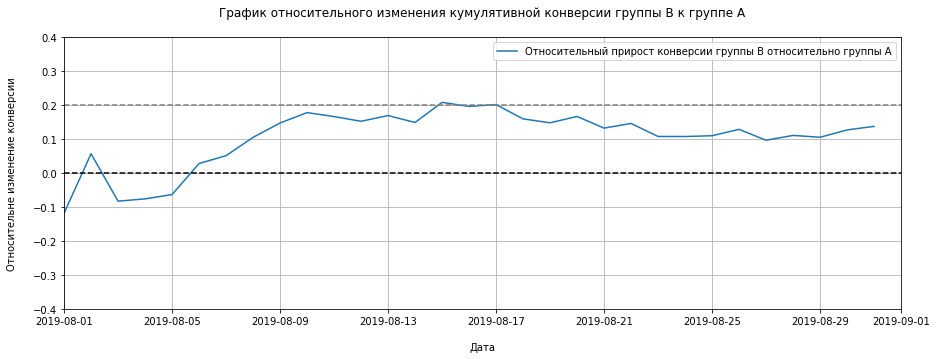

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение конверсии\n');

**Вывод**

Почти с самого начала группа `В` лидирует по конверсии. Приняла стабильные +12% относительно группы `А`.

### Построим точечный график количества заказов по пользователям для двух групп

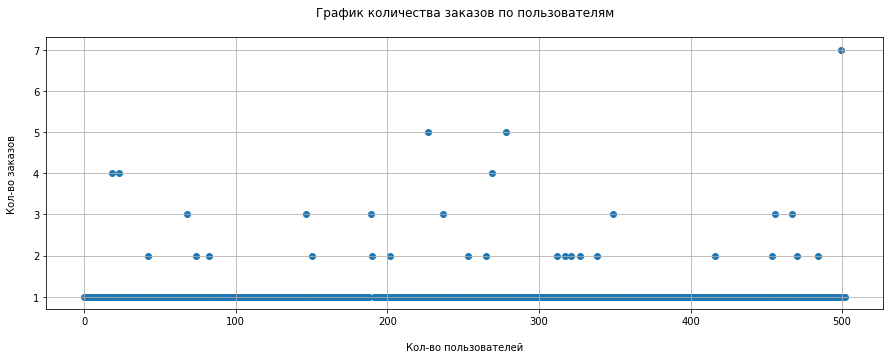

In [24]:
ordersByUsersA = orders.query('group == "A"').groupby('visitorId',as_index=False)['transactionId'].count()
ordersByUsersA.columns = ['visitorId', 'orders']

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsersA)))
plt.scatter(x_values, ordersByUsersA['orders']);

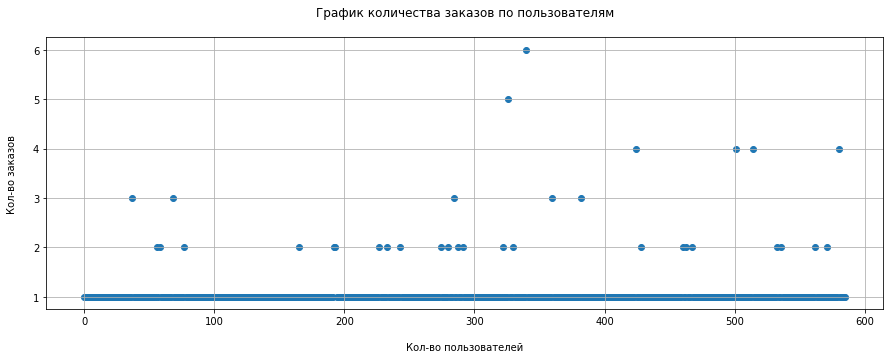

In [25]:
ordersByUsersB = orders.query('group == "B"').groupby('visitorId',as_index=False)['transactionId'].count()
ordersByUsersB.columns = ['visitorId', 'orders']

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsersB)))
plt.scatter(x_values, ordersByUsersB['orders']);

**Вывод**

- больше всего пользователей совершивших 1 заказ,
- совершивших 2 заказа значительно меньше,
- Встречаются пользователи, совершившие 3 и более заказов возможно они будут являться выбросами, стоит посчитать выборочные перцентили.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [26]:
# Метод np.percentile('column', [percentile1, percentile2]) находит перцентили.

print(np.percentile(ordersByUsersA['orders'], [95, 99])) 
print(np.percentile(ordersByUsersB['orders'], [95, 99])) 

[2.   3.98]
[2.   3.15]


В группе А не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов.

В группе В не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов.

**Вывод**

95-й и 99-й перцентили количества заказов на одного пользователя соответственно:

- для группы А: 2 и 3.98 заказа на пользователя
- для группы В: 2 и 3.15 заказа на пользователя

Примем за аномальных пользователей в обоих группах тех, кто совершил от 3 заказов и более.
Так мы уберём 1-3% пользователей с наибольшим числом заказов.

### Построим точечный график стоимостей заказов

<Figure size 1080x360 with 0 Axes>

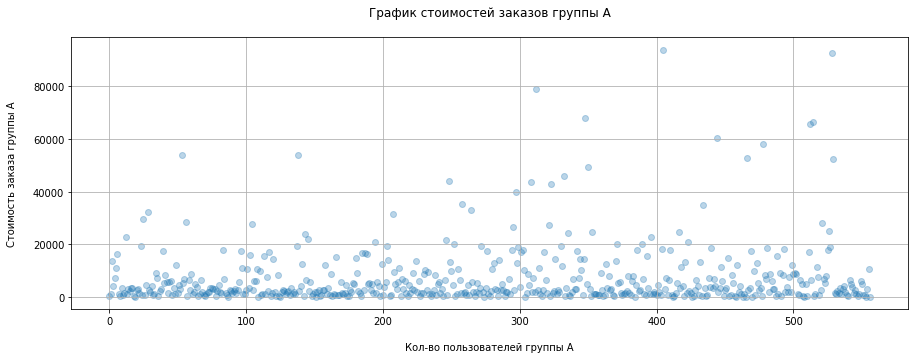

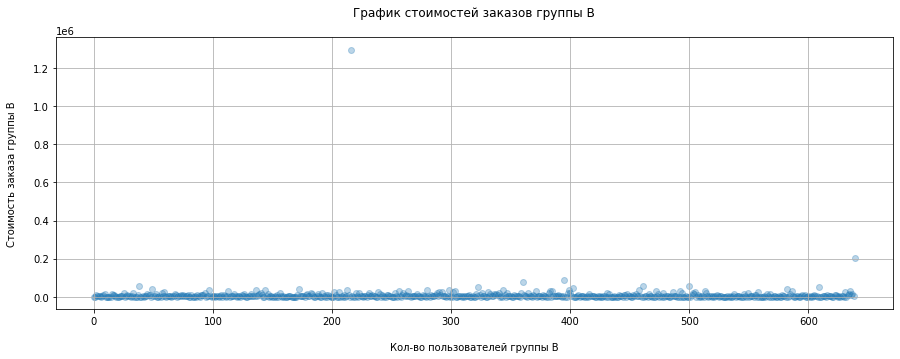

In [27]:
revenue_per_ordersA = orders.query('group == "A"')['revenue']
revenue_per_ordersB = orders.query('group == "B"')['revenue']

plt.figure(figsize=(15,5))

x_values = pd.Series(range(0,len(revenue_per_ordersA)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов группы А\n ')
plt.xlabel('\nКол-во пользователей группы А')
plt.ylabel('Стоимость заказа группы А\n')
plt.scatter(x_values, revenue_per_ordersA, alpha=0.3)

x_values = pd.Series(range(0,len(revenue_per_ordersB)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов группы B\n ')
plt.xlabel('\nКол-во пользователей группы B')
plt.ylabel('Стоимость заказа группы B\n')
plt.scatter(x_values, revenue_per_ordersB, alpha=0.3)

plt.show()

График не очень нагляный из-за наличия двух аномальных значений.

Посмотрим поближе, для это уберем очевидные выбросы с 'revenue' большим 100000

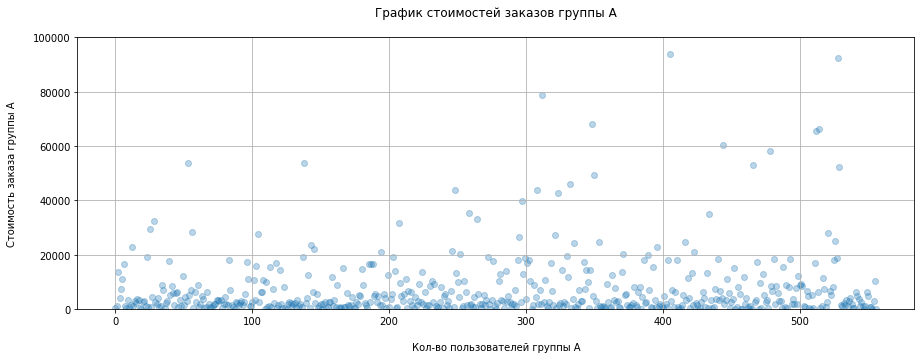

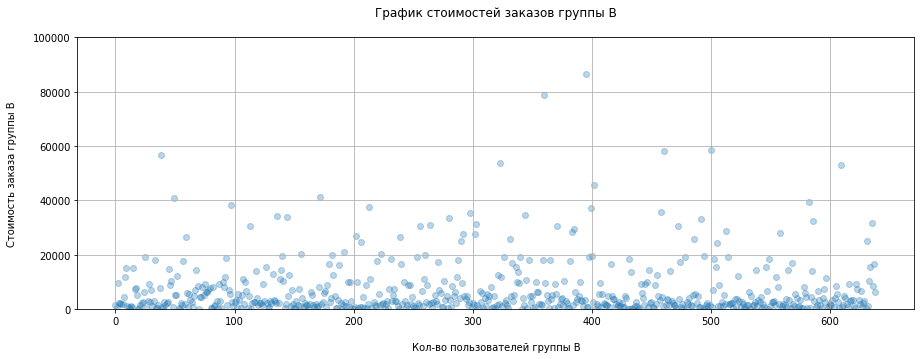

In [28]:
x_values = pd.Series(range(0,len(revenue_per_ordersA)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов группы А\n ')
plt.xlabel('\nКол-во пользователей группы А')
plt.ylabel('Стоимость заказа группы А\n')
plt.scatter(x_values, revenue_per_ordersA, alpha=0.3)
plt.ylim(0,100000)

x_values = pd.Series(range(0,len(revenue_per_ordersB)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов группы B\n ')
plt.xlabel('\nКол-во пользователей группы B')
plt.ylabel('Стоимость заказа группы B\n')
plt.scatter(x_values, revenue_per_ordersB, alpha=0.3)
plt.ylim(0,100000)

plt.show()

**Вывод**

Большая часть всех заказов не дороже 20000. Более точное распределение посмотрим с помощью перцентилей.

Выберем границу для определения аномальных заказов.

In [29]:
print(np.percentile(orders.query('group == "A"')['revenue'], [95, 99]))
print(np.percentile(orders.query('group == "B"')['revenue'], [95, 99]))

[26718.  62764.4]
[28787.45 55579.06]


В группе А не более 5% заказов на сумму свыше 26718 руб и не более 1% -на сумму свыше 62764 руб.

В группе В не более 5% заказов на сумму свыше 28787 руб и не более 1% -на сумму свыше 55579 руб.

**Вывод**

Найденные нами 95-й и 99-й перцентили средних чеков равны:

- для группы А: 26718 и 62764.4 рублей
- для группы В: 28787.45 и 55579.06 рублей

Примем за аномальных пользователей тех, кто совершил заказ дороже 55579 рублей.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Начнём с подготовки данных.
Соберем в общую таблицу все данные по заказам и визитам, добавив кумулятивные показатели.

In [30]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [31]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [32]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь мы можем посчитать статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [34]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**За нулевую гипотезу H0 примем** - статистически значимых различий в конверсиях между группами нет.  
**Тогда альтернативная гипотеза Н1** - статистически значимые различия есть.

In [35]:
#Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
display("относительный прирост конверсии группы B = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

'alpha = 0.05'

'p-value = 0.017'

'относительный прирост конверсии группы B = 0.138'

p-value = 0.017 меньше 0.05. Поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем.  

Это значит по «сырым» данным в конверсии между группами A и B есть статистически значимые различия. 

А относительный прирост группы В к А равен 13.8% .

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**За нулевую гипотезу H0 примем** - статистически значимых различий в среднемчеке между группами нет.  
**Тогда альтернативная гипотеза Н1** - статистически значимые различия есть.

In [36]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
display("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'alpha = 0.05'

'p-value = 0.729'

"Относительный показатель 'B' и 'A' = 0.259"

p-value = 0.729 значительно больше 0.05, поэтому можно считать, что значимых различий в среднем чеке между группами нет. 

По "сырым" данным средние чеки похожи. При этом средний чек группы B значительно выше среднего чека группы A (почти на 26%)

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Приступаем к подготовке очищенных от аномалий данных.  
В предыдущих расчётах мы приняли за аномальных пользователей тех, кто: 
- совершил 3 и больше заказов
- совершил заказ дороже 55579 рублей.  
Сделаем срезы пользователей:
- с числом заказов больше 2 — usersWithManyOrders
- совершивших заказы дороже 55579 — usersWithExpensiveOrders.  
Объединим их в таблицу abnormalUsers. 
Посмотрим количество аномальных пользователей методом shape()

In [37]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 55579]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

Всего аномальных пользователей = 31


Всего 31 аномальный пользователь. Посмотрим, как изменятся расчеты без их участия.

In [38]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

**За нулевую гипотезу H0 примем** - статистически значимых различий в конверсиях между группами нет.  
**Тогда альтернативная гипотеза Н1** - статистически значимые различия есть.

In [39]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


**Вывод**

p-value = 0.010 меньше 0.05. Поэтому, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. 

Это значит: и по «очищенным» данным в конверсии групп A и B есть статистически значимые различия. А относительный выигрыш группы "B" над "A" равен почти 17.4% (выше, чем с «сырыми» данными - 13.8%) 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**За нулевую гипотезу H0 примем:** "статистически значимых различий в средних чеках между группами нет".  
**Тогда альтернативная гипотеза Н1** - статистически значимые различия есть.

In [40]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель В и А = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель В и А = -0.020


**Вывод**

P-value = 0.798, значительно больше 0.05. Поэтому можем считать, что в среднем чеке нет различий (как и с "сырыми" данными). 

А вот средний чек группы B оказался незначительно (на 6%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше почти на ~26%. 

Вот так ощутимо повлияли на результаты наши аномальные заказы с большими суммами.

### Результаты теста и решение

Из представленных 9 гипотез с применением фреймворка RICE нами была выбрана как наиболее приоритетная гипотеза 8 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

По результатам А/В-тестирования гипотезы были сделаны следующие выводы:

- кумулятивная выручка группы В стабильно выше выручки группы А, кроме того, мы видим ее значительный скачек 19.08.2019.

- ситуация с кумулятивным средним чеком между группами не так однозначна: кривая группы В нестабильна, но все-таки выше аналогичной группы А.
 
- кумулятивная конверсия группы В стабильно выше, чем у группы А, с легкой тенденцией к снижению.
 
В обоих группах подавляющее большинство пользователей сделали по одному заказу, некоторые -по два, и очень редко- по 3-7. У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей,а порог заказов не превышает 100 тыс руб. Тем не менее на графике группы В можно заметить один аномально большой заказ на сумму 1294500 руб. Это и есть причина резкого скачка кумулятивного среднего чека группы В. В остальном группы очень похожи между собой.

Был произведен расчет статистической значимости различий в конверсии и в сумме среднего чека между группами по «сырым» и "очищенным" от выбросов данным:

- При проведении тестов с использованием критерия Манна-Уитни мы видим, что гипотеза о равенстве конверсии между группами отвергнута, а относительная разница конверсии группы В на 13.8% больше, чем в группе А. При тестировании "очищенных" от выбросов данных результат также подтвердился: конверсия отличается, а относительная разница составила 17.4%- на столько конверсия группы В больше конверсии группы А.

- Гипотеза о том, что различий в сумме среднего чека между группами нет, не отвергнута с очень большой долей вероятности, а относительная разница суммы среднего чека между группами составила 5.9% (против 25.9% по "сырым" данным)- после удаления выбросов (мы помним, что в группе В единственный очень крупный выброс- это один заказ на сумму 1.29 млн.) разница  между чеками обоих групп стремится к нулю.

**Выводы:**

Если целью тестирования было установить -изменилась ли сумма среднего чека, то она осталась прежней, мы видим лишь незначительные изменения.  Если же целью являлось изменение конверсии и связанное с ней получение дополнительной прибыли в перспективе -то результаты тестирования группы В говорят о том, что ее конверсия отличается от группы А на 13-19%.

**Рекомендации:**

Тест остановить, зафиксировать отсутствие различий между группами по сумме среднего чека и победу группы В в части повышенной конверсии.